In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#3d visualization
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

# 😇 Final 3D plot of auditory clusters 

In [41]:
df_aud=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/Three_Auditory_clusters.csv')
df_aud.head()

,AudSD,AudSeq,AudBeat,labels
0,0.79,0.57,0.53,2
1,0.90,0.97,1.00,1
2,0.90,0.70,0.37,2
3,0.79,0.57,0.50,2
4,0.79,0.43,0.93,1


In [42]:
color_map  = {0: 'mediumblue', 1: 'yellow', 2: 'palevioletred'}
df_aud['colors'] = df_aud['labels'].map(color_map)


trace=go.Scatter3d(x=df_aud['AudSD'], y=df_aud['AudSeq'], z=df_aud['AudBeat'], 
                   mode='markers', 
                   marker=dict(color=df_aud['labels'], size=5, line=dict(color=df_aud['labels'], width=12), opacity=0.8))
#color=df_aud['labels']
data=[trace]
layout=go.Layout(title='Auditory clusters', scene=dict(xaxis=dict(title='single interval'),
                                             yaxis=dict(title='non-beat sequence'),
                                             zaxis=dict(title='beat sequence')))
fig=go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

In [43]:
df_aud['labels']=df_aud['labels'].map({0:'cluster 1',1:'cluster 2',2:'cluster 3'})
df_aud.rename(columns={'AudSD':'single interval','labels':'clusters'},inplace=True)
df_aud

,single interval,AudSeq,AudBeat,clusters,colors
0,0.79,0.57,0.53,cluster 3,palevioletred
1,0.90,0.97,1.00,cluster 2,yellow
2,0.90,0.70,0.37,cluster 3,palevioletred
3,0.79,0.57,0.50,cluster 3,palevioletred
4,0.79,0.43,0.93,cluster 2,yellow
...,...,...,...,...,...
96,0.81,0.70,0.73,cluster 2,yellow
97,0.71,0.53,0.87,cluster 2,yellow
98,0.48,0.30,0.43,cluster 1,mediumblue
99,0.71,0.47,0.20,cluster 1,mediumblue


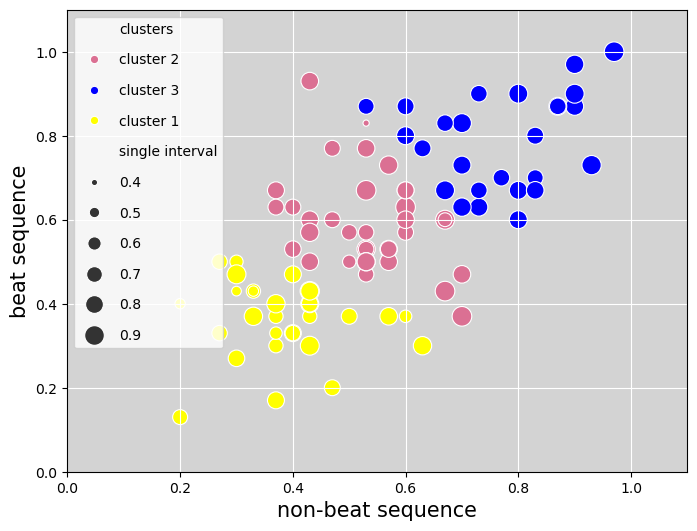

In [33]:
# Create the scatterplot
plt.figure(figsize=(8, 6))

# Set the background color to gray with white grids
plt.gca().set_facecolor('lightgray')
plt.grid(True, color='white')

# Customize the scatter plot
scatter = sns.scatterplot(x='AudSeq', y='AudBeat', size='single interval', hue='clusters', data=df_aud,
                          sizes=(20, 200), palette={'cluster 1': 'yellow', 'cluster 2': 'palevioletred','cluster 3':'blue'}) #legend="full",

# Set axis limits and intervals
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xticks(np.arange(0, 1.1, 0.2))
plt.yticks(np.arange(0, 1.1, 0.2))

# Adjust the legend to include size scale from 0 to 1 with increments of 0.2
scatter.legend_ = plt.legend(loc='best', labelspacing=1.2, markerscale=1, fontsize=10)

# new_labels = ['cluster 1', 'cluster 2', '0', '0.2','0.4','0.6','0.8','1']
# handles_swarm, labels_swarm = scatter.get_legend_handles_labels()

# # Create a legend with custom icon colors
# legend_colors = ['blue', 'yellow', 'k','k','k','k','k','k','k']  # Replace with your desired colors

# custom_handles = [
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 2
#     else plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
#     for idx, color in enumerate(legend_colors)
# ]

# dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
#                         frameon=False, fontsize=15, labelcolor='0.1', title='')

# Optionally, set the legend text (labels) color
# dot_legend.get_title().set_color('0.2')  
# handles, labels = scatter.get_legend_handles_labels()
# plt.legend(handles=handles, labels=['0', '0.2', '0.4', '0.6', '0.8', '1'], title='Sizes')

# Set plot labels and title
plt.xlabel('non-beat sequence',size=15)
plt.ylabel('beat sequence',size=15)
# plt.title('Scatterplot of VisSeq vs VisBeat with Customization')

### png format
# plt.savefig('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/auditory_clusters_scatterplot.png', bbox_inches='tight',dpi=400)
plt.show()


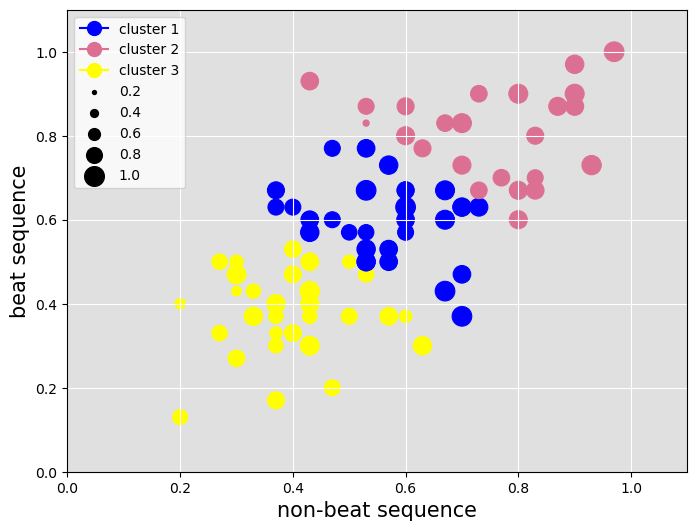

In [44]:
plt.figure(figsize=(8, 6))

plt.gca().set_facecolor('#E0E0E0')
plt.grid(True, color='white')

scatter = sns.scatterplot(data=df_aud, x='AudSeq', y='AudBeat', size='single interval', hue='clusters',
                         sizes=(20, 200), palette={'cluster 1': 'yellow', 'cluster 2': 'palevioletred', 'cluster 3': 'blue'},edgecolor='face')

# Create custom legend for size scale
size_scale = [0.2, 0.4, 0.6, 0.8, 1.0]
legend_handles_size = [plt.scatter([], [], s=s**2 * 200, color='black') for s in size_scale]
legend_labels_size = [f"{s:.1f}" for s in size_scale]

# Create legend for hue (clusters)
legend_handles_hue = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=10)
                     for color in ['blue', 'palevioletred', 'yellow']]
legend_labels_hue = ['cluster 1', 'cluster 2', 'cluster 3']

# Combine the legends and add to the plot
legend_handles = legend_handles_hue + legend_handles_size 
legend_labels = legend_labels_hue + legend_labels_size 
plt.legend(legend_handles, legend_labels, title="", loc="upper left", scatterpoints=1, fontsize=10)

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xticks(np.arange(0, 1.1, 0.2))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlabel('non-beat sequence',size=15)
plt.ylabel('beat sequence',size=15)

### tif format
# tif_path =r'C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/auditory_clusters_scatterplot.tif'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)

### png format
# plt.savefig('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/auditory_clusters_scatterplot.png', bbox_inches='tight',dpi=400)
plt.show()

# 😇 Final 3D plot of visual clusters 

In [35]:
df_vis=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/Two_Visual_clusters.csv')
df_vis.head()

,VisSD,VisSeq,VisBeat,labels
0,0.76,0.67,0.53,1
1,0.76,0.87,0.90,1
2,0.71,0.70,0.53,1
3,0.57,0.60,0.23,0
4,0.57,0.50,0.23,0


In [36]:
# df_vis['labels']=labels
color_map  = {0: 'mediumblue', 1: 'yellow'}
df_vis['colors'] = df_vis['labels'].map(color_map)


trace=go.Scatter3d(x=df_vis['VisSD'], y=df_vis['VisSeq'], z=df_vis['VisBeat'], 
                   mode='markers', 
                   marker=dict(color=df_vis['colors'], size=5, line=dict(color=df_vis['colors'], width=12), opacity=0.8))
#color=df_aud['labels']
data=[trace]
layout=go.Layout(title='Auditory clusters', scene=dict(xaxis=dict(title='single interval', range=[0,1], tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1]),
                                             yaxis=dict(title='non-beat sequence', range=[0,1], tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1]),
                                             zaxis=dict(title='beat sequence', range=[0,1], tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1])))
fig=go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

In [37]:
df_vis=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/Two_Visual_clusters.csv')
df_vis['labels']=df_vis['labels'].map({0:'cluster 1',1:'cluster 2'})
df_vis.rename(columns={'VisSD':'single interval','labels':'clusters'},inplace=True)
df_vis

,single interval,VisSeq,VisBeat,clusters
0,0.76,0.67,0.53,cluster 2
1,0.76,0.87,0.90,cluster 2
2,0.71,0.70,0.53,cluster 2
3,0.57,0.60,0.23,cluster 1
4,0.57,0.50,0.23,cluster 1
...,...,...,...,...
96,0.71,0.73,0.53,cluster 2
97,0.50,0.50,0.30,cluster 1
98,0.81,0.27,0.40,cluster 1
99,0.62,0.40,0.27,cluster 1


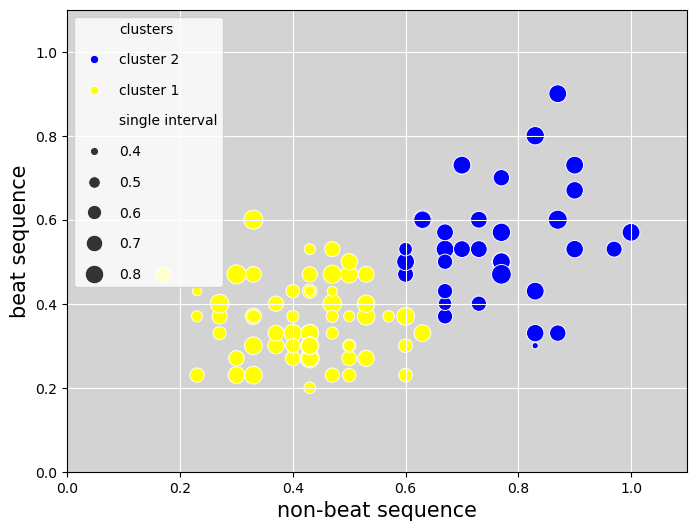

In [38]:
# df_vis=pd.read_csv('C:/Users/zhaleh/OneDrive/phd/PhD project/Codes/Python-JavaScript/kmeans/Online_two_visual_clusters.csv')

# Create the scatterplot
plt.figure(figsize=(8, 6))

# Set the background color to gray with white grids
plt.gca().set_facecolor('lightgray')
plt.grid(True, color='white')

# Customize the scatter plot
scatter = sns.scatterplot(x='VisSeq', y='VisBeat', size='single interval', hue='clusters', data=df_vis,
                          sizes=(20, 200), palette={'cluster 2': 'blue', 'cluster 1': 'yellow'}) #legend="full",

# Set axis limits and intervals
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xticks(np.arange(0, 1.1, 0.2))
plt.yticks(np.arange(0, 1.1, 0.2))

# Adjust the legend to include size scale from 0 to 1 with increments of 0.2
scatter.legend_ = plt.legend(loc='best', labelspacing=1.2, markerscale=1,fontsize=10)

# new_labels = ['cluster 1', 'cluster 2', '0', '0.2','0.4','0.6','0.8','1']
# handles_swarm, labels_swarm = scatter.get_legend_handles_labels()

# # Create a legend with custom icon colors
# legend_colors = ['blue', 'yellow', 'k','k','k','k','k','k','k']  # Replace with your desired colors

# custom_handles = [
#     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 2
#     else plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
#     for idx, color in enumerate(legend_colors)
# ]

# dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
#                         frameon=False, fontsize=15, labelcolor='0.1', title='')

# Optionally, set the legend text (labels) color
# dot_legend.get_title().set_color('0.2')  
# handles, labels = scatter.get_legend_handles_labels()
# plt.legend(handles=handles, labels=['0', '0.2', '0.4', '0.6', '0.8', '1'], title='Sizes')

# Set plot labels and title
plt.xlabel('non-beat sequence',size=15)
plt.ylabel('beat sequence',size=15)
# plt.title('Scatterplot of VisSeq vs VisBeat with Customization')

plt.show()


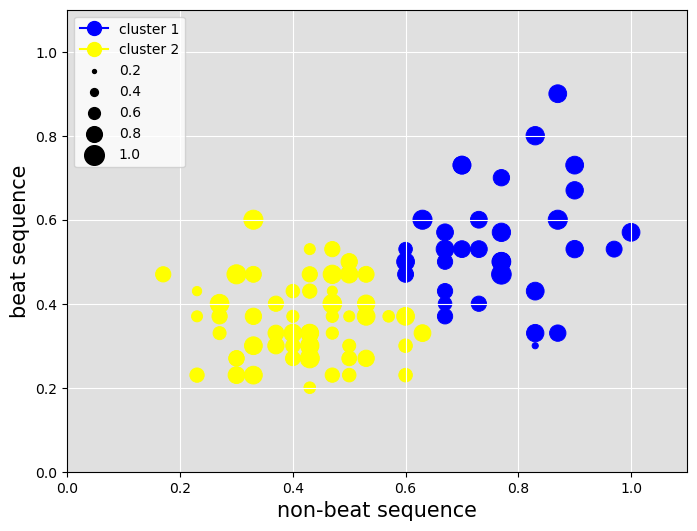

In [39]:
plt.figure(figsize=(8, 6))

plt.gca().set_facecolor('#E0E0E0')
plt.grid(True, color='white')

scatter = sns.scatterplot(data=df_vis, x='VisSeq', y='VisBeat', size='single interval', hue='clusters',
                         sizes=(20, 200), palette={'cluster 1': 'yellow', 'cluster 2': 'blue'},edgecolor='face')

# Create custom legend for size scale
size_scale = [0.2, 0.4, 0.6, 0.8, 1.0]
legend_handles_size = [plt.scatter([], [], s=s**2 * 200, color='black') for s in size_scale]
legend_labels_size = [f"{s:.1f}" for s in size_scale]

# Create legend for hue (clusters)
legend_handles_hue = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=10)
                     for color in ['blue', 'yellow']]
legend_labels_hue = ['cluster 1', 'cluster 2']

# Combine the legends and add to the plot
legend_handles = legend_handles_hue + legend_handles_size 
legend_labels = legend_labels_hue + legend_labels_size 
plt.legend(legend_handles, legend_labels, title="", loc="upper left", scatterpoints=1, fontsize=10)

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xticks(np.arange(0, 1.1, 0.2))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlabel('non-beat sequence',size=15)
plt.ylabel('beat sequence',size=15)

### tif format
# tif_path =r'C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/visual_clusters_scatterplot.tif'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/visual_clusters_scatterplot.png', bbox_inches='tight',dpi=400)
plt.show()
